In [1]:
#Author: Fardeen Ahmad Khan
#Email: fardeenahmadkhan786@gmail.com

In [2]:
#importations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#reading csv file from local machine as data
data = pd.read_excel(r"F:\Web Dev\Kaggle\Datasets\titanic3.xls")

In [4]:
#first look at our data
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
#checking for null values in our dataframe
data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [6]:
#its clear that the coloumns 'Cabin', 'Body' and 'Boat' are so erraneous we cannot repair them
#hence, let's drop these cols to make our data more reliable
data.drop(['cabin'],axis=1, inplace=True)
data.drop(['boat'],axis=1, inplace=True)
data.drop(['body'],axis=1, inplace=True)

In [7]:
#now that the cols are dropped let's check for missing values again
data.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
embarked       2
home.dest    564
dtype: int64

In [8]:
#lets tend to each of these cols one by one.
#age col is clearly numerical 
#since some of the members have not specified their ages, 
#let's assume the mean age of all of them as their age

data['age'].mean()

29.8811345124283

In [9]:
data['age'].fillna(data['age'].mean(), inplace=True)

In [10]:
data.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           1
embarked       2
home.dest    564
dtype: int64

In [11]:
#coming to the fare col, let's find the average fare and fill the null values
data['fare'].mean()

33.29547928134572

In [12]:
data['fare'].fillna(data['fare'].mean(), inplace=True)

In [13]:
data.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
embarked       2
home.dest    564
dtype: int64

In [14]:
#the remaining column is embarked, since this value type is categorical we cannot use average here
# we need to see what is the most reported value in this col and can interpolate the same.
data['embarked'].mode()

0    S
dtype: object

In [15]:
data['embarked'].fillna('S',inplace=True)

In [16]:
data.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
embarked       0
home.dest    564
dtype: int64

In [17]:
# all null values have been removed from our relevant data
# home. dest column is irrelevant so we will ignore it
# we might as well remove it
data.drop(['home.dest'],axis=1, inplace=True)

In [18]:
data.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

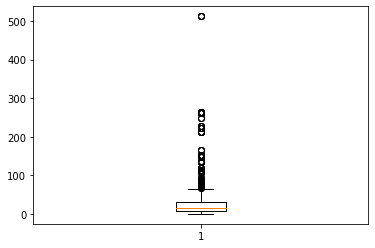

In [20]:
#after resolving all the null values we will be looking at Outlier detection
#we must understand that outlier detection is only relevant with numerical values
# like fare or age
plt.boxplot(data['fare'])
plt.show()

In [23]:
#its clearly visible that most of the values are consolidated within 100
#and the range of values is from 30 to 300
# also, the plot shows that some people also paid around 500 dollars for this trip
# for social purposes this might be relevant, but for statistical purposes this
# counts as an outlier.

#Using interquartile range method to remove outliers
q1, q3 = np.quantile(data['fare'],0.25), np.quantile(data['fare'],0.75)
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR

ot1 = data[data['fare']>upper_bound]
ot2 = data[data['fare']<lower_bound]
print("First and Third Quantiles: {} and {}".format(q1,q3))
print("Interquantile Range: {}".format(IQR))
print("Upper Bound: {} and Lower Bound: {}".format(upper_bound,lower_bound))
print("Total no. of Outliers in fare {}".format(ot1.shape[0]+ot2.shape[0]))

First and Thired Quantiles: 7.8958 and 31.275
Interquantile Range: 23.379199999999997
Upper Bound: 66.34379999999999 and Lower Bound: -27.172999999999995
Total no. of Outliers in fare 171


In [29]:
#creating a new dataframe with no outliers
data_new = data[np.logical_and(data['fare']<upper_bound,data['fare']>lower_bound)]
data_new['fare'].describe()

count    1138.000000
mean       17.975548
std        13.831313
min         0.000000
25%         7.879200
50%        13.000000
75%        26.000000
max        65.000000
Name: fare, dtype: float64

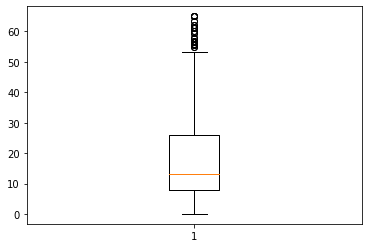

In [30]:
plt.boxplot(data_new['fare'])
plt.show()

In [ ]:
#as we can see our data is much more streamlined now and we haven't lost much of the data too
# just 171 rows removed out 1300